In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('17July.csv')
df = df.dropna().reset_index(drop=True)

In [3]:
df.columns

Index(['DGCI_y', 'hueY', 'satY', 'briY', 'DGCI_g', 'hueG', 'satG', 'briG',
       'DGCI_l', 'hue_l', 'sat_l', 'bri_l', 'Correct_DGCI_l', 'max_DGCI',
       ' std_DGCI', 'Corrected_hue_l', 'Slope', 'Slope_hue', 'Yintercept',
       'Yintercept_hue', 'Red', 'Green', 'Blue', 'c1', 'c2', 'c3', 'c4', 'c5',
       'canopy', 'k', 'Plot Number', 'rate', 'new_rate', 'rate_str', 'cluster',
       'cluster_converted', 'merged_rating'],
      dtype='object')

In [4]:
df1 = df[['DGCI_l', 'hue_l', 'Correct_DGCI_l', 'max_DGCI',
       ' std_DGCI', 'Corrected_hue_l','Red', 'Green', 'Blue', 'c1', 'c2', 'c3', 'c4', 'c5',
       'canopy', 'k', 'rate']].copy()

In [5]:
ratings = [1,2,3,4]
for r in ratings:

    plt.hist(df.loc[df['merged_rating']==r,'Correct_DGCI_l'])
    plt.xticks(np.arange(0.2, 0.42, step=0.02))
    plt.yticks(np.arange(0, 16, step=1))
    plt.xlabel('DGCI')
    plt.ylabel('Frequency')
    plt.title('DGCI distribution of plots with rate = {}'.format(float(r)))
    plt.savefig(r'C:\Users\oveis.jalilian\Desktop\r{}.png'.format(float(r)),dpi=600)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [6]:
import plotly.graph_objects as go

colors= ['#c5d627','#b3d627','#9fd627','#90d627',
         '#7fd627','#6ad627','#56d627','#47d627',
         '#43bd28','#3fab27','#3b9c25','#388c24']

x=df.loc[df['merged_rating']==4,'Correct_DGCI_l']

fig = go.Figure()

fig.add_trace(go.Histogram(x=np.array(x),
                                marker_color=colors,
                                xbins=dict(
                                    start=0.1,
                                    end=0.42,
                                    size=0.02
                                            ),
                                autobinx=False
                                  
                                  ))

fig.update_layout(
    autosize=True,
    width=600,
    height=500,
    yaxis_title_text = 'Frequency'

    )
fig.update_xaxes(range=[0.18, 0.42],tickvals=np.arange(0.2,0.42,0.02))    
fig.update_yaxes(range=[0, 16])

fig.show()

In [7]:
x=df.loc[df['merged_rating']==1,'Correct_DGCI_l']
type(np.array(x))
x.min()

0.270400519

In [8]:
#sns.lmplot(x='Correct_DGCI_l', y='rate', data=df)

In [9]:
#sns.heatmap(data=df1.corr())

In [10]:
df.merged_rating.value_counts().sort_index()

1    34
2    66
3    49
4    11
Name: merged_rating, dtype: int64

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
X = df1[['Correct_DGCI_l',' std_DGCI','c1', 'c2', 'c3', 'c4', 'c5','canopy']].copy()
y = df.new_rate.apply(lambda x: str(x)).copy()
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
DT = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
Ada = AdaBoostClassifier(n_estimators=50,base_estimator=DT,random_state=42)

In [14]:
Ada.fit(X_train, y_train)
y_pred = Ada.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[4 2 0 0 0 0 0]
 [2 3 1 0 2 0 0]
 [0 1 1 0 0 1 0]
 [1 0 3 1 2 2 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 2 0 0]]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.57      0.67      0.62         6
         1.5       0.50      0.38      0.43         8
         2.0       0.20      0.33      0.25         3
         2.5       0.50      0.11      0.18         9
         3.0       0.00      0.00      0.00         3
         3.5       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         2

    accuracy                           0.28        32
   macro avg       0.25      0.21      0.21        32
weighted avg       0.39      0.28      0.30        32



c:\users\oveis.jalilian\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



<H2> Clustering </H2>

In [16]:
from sklearn.cluster import KMeans, DBSCAN

In [17]:
X.head()

Correct_DGCI_l   std_DGCI      c1      c2      c3     c4     c5   canopy
0        0.277524   0.122306  335089  682120  184383  11896      0  1213488
1        0.364296   0.129514  133163  773572  460380  67278    307  1434700
2        0.298042   0.119972  286417  838756  243805  18775      0  1387753
3        0.299743   0.099210  116479  587648  119612   6528      0   830267
4        0.384464   0.168708  108613  433178  266053  88142  18604   914692

In [18]:
cluster = KMeans(n_clusters=4, random_state=0, n_init=50).fit(X)
dbscan = DBSCAN(eps=0.30, min_samples=5).fit(X)

In [19]:
df['rate_str'] = df.rate.apply(lambda x: str(x))

In [20]:
df['cluster'] =  cluster.labels_

In [21]:
df.cluster += 1
df.cluster.value_counts()

1    64
3    46
4    36
2    14
Name: cluster, dtype: int64

In [22]:
df.merged_rating.value_counts()

2    66
3    49
1    34
4    11
Name: merged_rating, dtype: int64

In [23]:
df['clusterTest'] = df.cluster == df.merged_rating
df['clusterTest'].value_counts()
df.loc[df.clusterTest==True,'merged_rating']

10     3
17     1
26     3
47     1
59     2
61     3
62     3
65     2
70     4
79     1
83     4
87     3
97     4
101    4
110    1
115    2
119    2
122    1
125    4
128    2
137    1
146    4
155    4
157    1
Name: merged_rating, dtype: int64

In [24]:
#df['cluster_converted'] = pd.cut(df.cluster,7,labels=['1','1.5','2','2.5','3','3.5','4'])
df['cluster_converted'] = pd.cut(df.cluster,4,labels=['1','2','3','4'])

In [25]:
confusion_matrix(y_train,Ada.predict(X_train))

array([[26,  2,  0,  0,  0,  0],
       [ 4, 28,  0,  0,  0,  0],
       [ 1,  0, 22,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0, 20,  2],
       [ 0,  0,  0,  0,  0,  8]], dtype=int64)

In [26]:
print(classification_report(y_train,Ada.predict(X_train)))

              precision    recall  f1-score   support

         1.0       0.84      0.93      0.88        28
         1.5       0.93      0.88      0.90        32
         2.0       1.00      0.96      0.98        23
         2.5       1.00      1.00      1.00        15
         3.0       1.00      0.91      0.95        22
         3.5       0.80      1.00      0.89         8

    accuracy                           0.93       128
   macro avg       0.93      0.94      0.93       128
weighted avg       0.94      0.93      0.93       128



In [27]:
# for i in range(len(y_test)):
#     print ("{:>3}".format(X_test.index[i]),'   ',df.iloc[X_test.index[i],29],'  ',y_test.values[i],'  ',y_pred[i],'  ',df.new_rate[X_test.index[i]])

<H1>Combining classes</H1>

In [28]:
def merge_rating(x):
    if x==1:
        return 1
    elif x in [1.5,2]:
        return 2
    elif x in [2.5,3]:
        return 3
    else:
        return 4

df['merged_rating'] = df.new_rate.apply(merge_rating)

In [29]:
# for i in range(160):
#     print(df['new_rate'][i],df['merged_rating'][i])

In [30]:
DT = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
Ada = AdaBoostClassifier(n_estimators=50,base_estimator=DT,random_state=42)
X_train,X_test , y_train_merged,y_test_merged = train_test_split(X, df.merged_rating, test_size = 0.2, random_state = 42)
Ada.fit(X_train, y_train_merged)
y_pred = Ada.predict(X_test)
print(confusion_matrix(y_test_merged,y_pred))

[[4 2 0 0]
 [1 9 1 0]
 [0 4 5 3]
 [0 2 1 0]]


In [31]:
print(classification_report(y_test_merged, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       0.53      0.82      0.64        11
           3       0.71      0.42      0.53        12
           4       0.00      0.00      0.00         3

    accuracy                           0.56        32
   macro avg       0.51      0.48      0.47        32
weighted avg       0.60      0.56      0.55        32



In [32]:
df['merged_rating'].value_counts()

2    66
3    49
1    34
4    11
Name: merged_rating, dtype: int64

<H1>Here I test the linear models with both Statsmodels and Sklearn modules</H1>

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg = LinearRegression()
X_linear = X.apply(lambda x : np.round(x*100/x.canopy,2),1)
X_linear[['canopy','Correct_DGCI_l', ' std_DGCI']] = X[['canopy','Correct_DGCI_l', ' std_DGCI']].copy()
maxCanopy = max(X.canopy)
X_linear.canopy = X_linear.canopy.apply(lambda x: np.round(x*100/maxCanopy,2))
y= y.apply(lambda x: float(x))
X_train_linear,X_test_linear, y_train,y_test = train_test_split(X_linear, y, test_size = 0.2, random_state = 42)
reg.fit(X_train_linear, y_train)
ypred = reg.predict(X_test_linear)
mse = mean_squared_error(y_test, ypred)
mse

0.3544572780568083

In [35]:
#import statsmodels.formula.api as sm
import statsmodels.api as sm
X_opt=np.append(arr=np.ones((len(X_train_linear),1)).astype(int), values=X_train, axis=1)
X_sel = X_opt[:,[0,1,3,4]]
reg_ols=sm.OLS(y_train, X_sel).fit()
reg_ols.pvalues
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               new_rate   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     37.75
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           2.10e-17
Time:                        18:37:47   Log-Likelihood:                -109.78
No. Observations:                 128   AIC:                             227.6
Df Residuals:                     124   BIC:                             239.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2441      0.667     10.863      0.000       5.924       8.564
x1           -14.1530      2.069     -6.839      0.000     -18.249     -10.057
x2         -1.925e-06   7.64e-07     -2.520      0.013   -3.44e-06   -4.13e-07
x3         -9.011e-07   2.55e-07     -3.536      0.001   -1.41e-06   -3.97e-07
==============================================================================
Omnibus:                        2.045   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.568
Skew:                           0.073   Prob(JB):                        0.457
Kurtosis:                       2.478   Cond. No.                     3.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
type(y_train)

pandas.core.series.Series

In [37]:
# the actual features need to reduce 1 from X_sel
X_linear.iloc[0:3,[0,2,3]]

Correct_DGCI_l     c1     c2
0        0.277524  27.61  56.21
1        0.364296   9.28  53.92
2        0.298042  20.64  60.44

<H1>Here I try to oversample the minority classes in combined rating dataset with SMOTE method</H1>

In [38]:
from imblearn.over_sampling import SMOTE, ADASYN

In [39]:
sm = SMOTE(random_state=2,k_neighbors=6)
X_resampled, y_resampled = sm.fit_sample(X_linear, df['merged_rating'])
X_resampled = pd.DataFrame(X_resampled)
X_resampled.columns = X.columns

In [40]:
y_resampled = pd.Series(y_resampled)
X_resampled.shape

(264, 8)

<h3> Took 10% of the data as validation set (Unseen dataset)</h3>

In [41]:
DT = DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)
Ada = AdaBoostClassifier(n_estimators=50,base_estimator=DT,random_state=42,learning_rate=0.01)

# try:
#     X_resampled.drop([' std_DGCI', 'c1', 'c2','c3','c4','c5'],inplace=True,axis=1)
# except:
#     print("")

# 10% percent is used for validation

from sklearn.model_selection import cross_val_score
X_train_resampled,X_valid_resampled , y_train_resampled,y_valid_resampled = train_test_split(
                                X_resampled, y_resampled, test_size = 0.2, random_state = 42, stratify=y_resampled)

scores = cross_val_score(Ada,X_train_resampled, y_train_resampled,cv=5,scoring = 'recall_macro')
print("Average score of CV is: {}".format(np.mean(scores)))

Ada.fit(X_train_resampled, y_train_resampled)
y_pred = Ada.predict(X_valid_resampled)
print(confusion_matrix(y_valid_resampled,y_pred))
print("****************** Train Results********************")
print(confusion_matrix(y_train_resampled,Ada.predict(X_train_resampled)))
print(y_train_resampled.value_counts())

Average score of CV is: 0.6472727272727272
[[12  0  1  0]
 [ 3  5  5  0]
 [ 0  4  9  1]
 [ 0  0  0 13]]
****************** Train Results********************
[[46  4  3  0]
 [ 7 43  3  0]
 [ 0  2 50  0]
 [ 0  0  0 53]]
4    53
2    53
1    53
3    52
dtype: int64


In [42]:
Ada.feature_importances_

array([0.09430708, 0.02851099, 0.22321007, 0.03000239, 0.23815369,
       0.04814567, 0.01353773, 0.32413239])

In [43]:

print("*********** Accuracy score is {:.2} **************".format(accuracy_score(y_valid_resampled, y_pred)))
print(classification_report(y_valid_resampled, Ada.predict(X_valid_resampled)))

*********** Accuracy score is 0.74 **************
              precision    recall  f1-score   support

           1       0.80      0.92      0.86        13
           2       0.56      0.38      0.45        13
           3       0.60      0.64      0.62        14
           4       0.93      1.00      0.96        13

    accuracy                           0.74        53
   macro avg       0.72      0.74      0.72        53
weighted avg       0.72      0.74      0.72        53



In [44]:
y_valid_resampled.value_counts()

3    14
4    13
2    13
1    13
dtype: int64

In [45]:
len(X_resampled)

264

<h2>Here I try to fit a Decision Tree to study the structure of the tree and which features are more important on a tree graph</h2>

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

scores = cross_val_score(dt,X_train_resampled, y_train_resampled,cv=5,scoring = 'recall_macro')
print("Average score of CV is: {}".format(np.mean(scores)))

dt.fit(X_train_resampled, y_train_resampled)
y_pred = dt.predict(X_valid_resampled)
print(confusion_matrix(y_valid_resampled,y_pred))

print("****************** Validation Results *********************************")
print(classification_report(y_valid_resampled, dt.predict(X_valid_resampled)))

Average score of CV is: 0.5904545454545455
[[11  1  1  0]
 [ 3  6  4  0]
 [ 0  6  6  2]
 [ 0  0  1 12]]
****************** Validation Results *********************************
              precision    recall  f1-score   support

           1       0.79      0.85      0.81        13
           2       0.46      0.46      0.46        13
           3       0.50      0.43      0.46        14
           4       0.86      0.92      0.89        13

    accuracy                           0.66        53
   macro avg       0.65      0.66      0.66        53
weighted avg       0.65      0.66      0.65        53



In [47]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import collections
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

dot_data = export_graphviz(dt, feature_names=X_valid_resampled.columns,
                out_file=None, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
    
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_pdf('tree.pdf')

True

<h1>Fitting Random Forest</h1>

In [48]:
rf = RandomForestClassifier(n_estimators=20, max_depth=3, min_samples_leaf=10,random_state=42,bootstrap=False)
rf.fit(X_train_resampled, y_train_resampled)

scores = cross_val_score(dt,X_train_resampled, y_train_resampled,cv=5,scoring = 'recall_macro')
print("Average score of CV is: {}".format(np.mean(scores)))

y_pred = rf.predict(X_valid_resampled)
print(confusion_matrix(y_valid_resampled,y_pred))

print("****************** Validation Results *********************************")
print(classification_report(y_valid_resampled, rf.predict(X_valid_resampled)))


Average score of CV is: 0.5904545454545455
[[11  1  1  0]
 [ 3  5  5  0]
 [ 0  4  7  3]
 [ 0  0  0 13]]
****************** Validation Results *********************************
              precision    recall  f1-score   support

           1       0.79      0.85      0.81        13
           2       0.50      0.38      0.43        13
           3       0.54      0.50      0.52        14
           4       0.81      1.00      0.90        13

    accuracy                           0.68        53
   macro avg       0.66      0.68      0.67        53
weighted avg       0.66      0.68      0.66        53



In [49]:
Feature_importance = list(zip(X_valid_resampled.columns,Ada.feature_importances_))
Feature_importance = [(i[0],round(i[1],2)) for i in Feature_importance]
Feature_importance

[('Correct_DGCI_l', 0.09),
 (' std_DGCI', 0.03),
 ('c1', 0.22),
 ('c2', 0.03),
 ('c3', 0.24),
 ('c4', 0.05),
 ('c5', 0.01),
 ('canopy', 0.32)]

<h1>Fitting logistic regression</h1>

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', multi_class='auto',random_state=42)
lr.fit(X_train_resampled, y_train_resampled)
y_pred = lr.predict(X_valid_resampled)
print(confusion_matrix(y_valid_resampled,y_pred))
print(classification_report(y_valid_resampled, y_pred))
print("****************** Validation Results *********************************")
print(classification_report(y_valid_resampled, lr.predict(X_valid_resampled)))

[[10  3  0  0]
 [ 4  5  3  1]
 [ 0  6  5  3]
 [ 0  0  1 12]]
              precision    recall  f1-score   support

           1       0.71      0.77      0.74        13
           2       0.36      0.38      0.37        13
           3       0.56      0.36      0.43        14
           4       0.75      0.92      0.83        13

    accuracy                           0.60        53
   macro avg       0.59      0.61      0.59        53
weighted avg       0.59      0.60      0.59        53

****************** Validation Results *********************************
              precision    recall  f1-score   support

           1       0.71      0.77      0.74        13
           2       0.36      0.38      0.37        13
           3       0.56      0.36      0.43        14
           4       0.75      0.92      0.83        13

    accuracy                           0.60        53
   macro avg       0.59      0.61      0.59        53
weighted avg       0.59      0.60      0.59        5

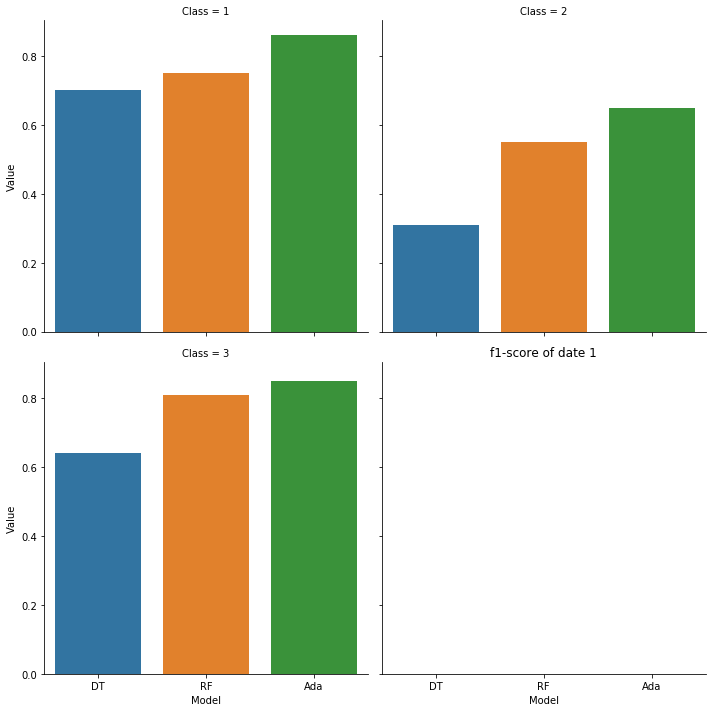

In [51]:
perf = pd.read_csv('Performance.csv')
perf_1 = perf[(perf.Date == 1) &(perf.Performance_Type =='f1-score')]
perf_2 = perf[(perf.Date == 2) & (perf.Performance_Type =='f1-score')]
date=1
if date==1:
    sns.catplot(x='Model', y='Value', col='Class',kind="bar", col_wrap=2,data=perf_1)
else:
    sns.catplot(x='Model', y='Value', col='Class',kind="bar", col_wrap=2,data=perf_2)
# plt.xticks('Decision Tree','Random Forest','Adaboost')
plt.title("f1-score of date {}".format(date))
plt.savefig(r'C:\Users\oveis.jalilian\Desktop\{}.pdf'.format("f1-score"),dpi=600)

In [52]:
X_linear.describe()

Correct_DGCI_l    std_DGCI          c1          c2          c3  \
count      160.000000  160.000000  160.000000  160.000000  160.000000   
mean         0.292636    0.108467   20.925937   62.643500   15.084187   
std          0.034723    0.020253    9.001297    7.970149    7.157973   
min          0.224285    0.073430    4.210000   41.310000    3.630000   
25%          0.267994    0.094742   14.375000   56.907500    9.790000   
50%          0.291239    0.103174   19.960000   63.355000   13.980000   
75%          0.314541    0.115950   27.070000   69.227500   19.487500   
max          0.405788    0.182255   44.560000   79.060000   39.010000   

               c4          c5      canopy  
count  160.000000  160.000000  160.000000  
mean     1.275375    0.069687   52.119125  
std      1.907899    0.266657   14.986205  
min      0.010000    0.000000    9.260000  
25%      0.260000    0.000000   41.650000  
50%      0.605000    0.000000   52.100000  
75%      1.222500    0.000000   61.627500  
max     10.060000    2.030000  100.000000